In [1]:
!pip install scikit-learn

In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=5a47f81dfc67cab41abf01a310a2603cc331d667514f133bce7f1720ed2cd0de
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"

url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/1ssplit%20combined%20dataset%20CAIDA%202007.csv"

df = pd.read_csv(url)



In [4]:
# Filter rows where any of the specified columns contain 0
rows_to_remove = df[(df['etpSrcP'] == 0) | (df['etpDstP'] == 0) | (df['etpProtocol'] == 0)]

# Remove the filtered rows from the DataFrame
df = df.drop(rows_to_remove.index)

# Display the updated DataFrame
print(df)


       etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
3      2.763893  1.445125  3.094029     0.999693          582      0
4      2.968837  0.483287  3.276253     0.996651          646      0
5      2.974757  0.493776  3.196968     0.999476          668      0
6      2.741217  0.528638  2.835763     0.971584          551      0
7      2.959494  0.528946  2.839875     0.970081          542      0
...         ...       ...       ...          ...          ...    ...
3637  11.897488  1.111502  0.720233     0.348161       165189      1
3638  11.901267  1.179760  0.761775     0.362799       170231      1
3639  11.904386  1.157667  0.747981     0.358014       170030      1
3640  11.905567  1.137305  0.735195     0.353817       165362      1
3641  11.905497  1.163520  0.750054     0.359140       170064      1

[2988 rows x 6 columns]


In [5]:
# # Import necessary libraries
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Step 1: Visualize distributions of numerical features
# sns.pairplot(df)
# plt.show()

# # Step 2: Calculate summary statistics
# summary_stats = df.describe()
# print(summary_stats)

# # Step 3: Detect outliers using Z-score
# from scipy import stats

# # Define a function to detect outliers using Z-score
# def detect_outliers_zscore(data):
#     z_scores = stats.zscore(data)
#     abs_z_scores = abs(z_scores)
#     outlier_indices = (abs_z_scores > 3).any(axis=1)
#     return outlier_indices

# # Apply the function to numerical columns
# numerical_columns = ['etpSrcP', 'etpDstP', 'totalPacket']
# outliers_zscore = detect_outliers_zscore(df[numerical_columns])

# # Step 4: Visualize outliers using box plots
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df[numerical_columns])
# plt.title('Box plot of numerical features')
# plt.show()

# # Print rows containing outliers
# print(df[outliers_zscore])



In [6]:
# Filter rows where any of the specified columns contain 0
rows_with_zero_value = df[(df['etpSrcP'] == 0) | (df['etpDstP'] == 0) | (df['etpProtocol'] == 0)]

# Display the filtered rows
print(rows_with_zero_value)
len(rows_with_zero_value)
rows_with_zero_value

Empty DataFrame
Columns: [etpSrcIP, etpSrcP, etpDstP, etpProtocol, totalPacket, label]
Index: []


,etpSrcIP,etpSrcP,etpDstP,etpProtocol,totalPacket,label


In [7]:
# Display the first few rows of the dataset to understand its structure
print(df.head())




   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
3  2.763893  1.445125  3.094029     0.999693          582      0
4  2.968837  0.483287  3.276253     0.996651          646      0
5  2.974757  0.493776  3.196968     0.999476          668      0
6  2.741217  0.528638  2.835763     0.971584          551      0
7  2.959494  0.528946  2.839875     0.970081          542      0


In [8]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 2988 entries, 3 to 3641
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   etpSrcIP     2988 non-null   float64
 1   etpSrcP      2988 non-null   float64
 2   etpDstP      2988 non-null   float64
 3   etpProtocol  2988 non-null   float64
 4   totalPacket  2988 non-null   int64  
 5   label        2988 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 163.4 KB
None
          etpSrcIP      etpSrcP      etpDstP  etpProtocol    totalPacket  \
count  2988.000000  2988.000000  2988.000000  2988.000000    2988.000000   
mean      9.437737     1.001483     0.783486     0.381017  111228.131526   
std       4.234023     0.414855     0.577350     0.175303   75499.556019   
min       2.048854     0.020188     0.020188     0.023508     199.000000   
25%       3.117199     0.893115     0.733881     0.358087     545.750000   
50%      12.014996     1.186233     0.785434     0

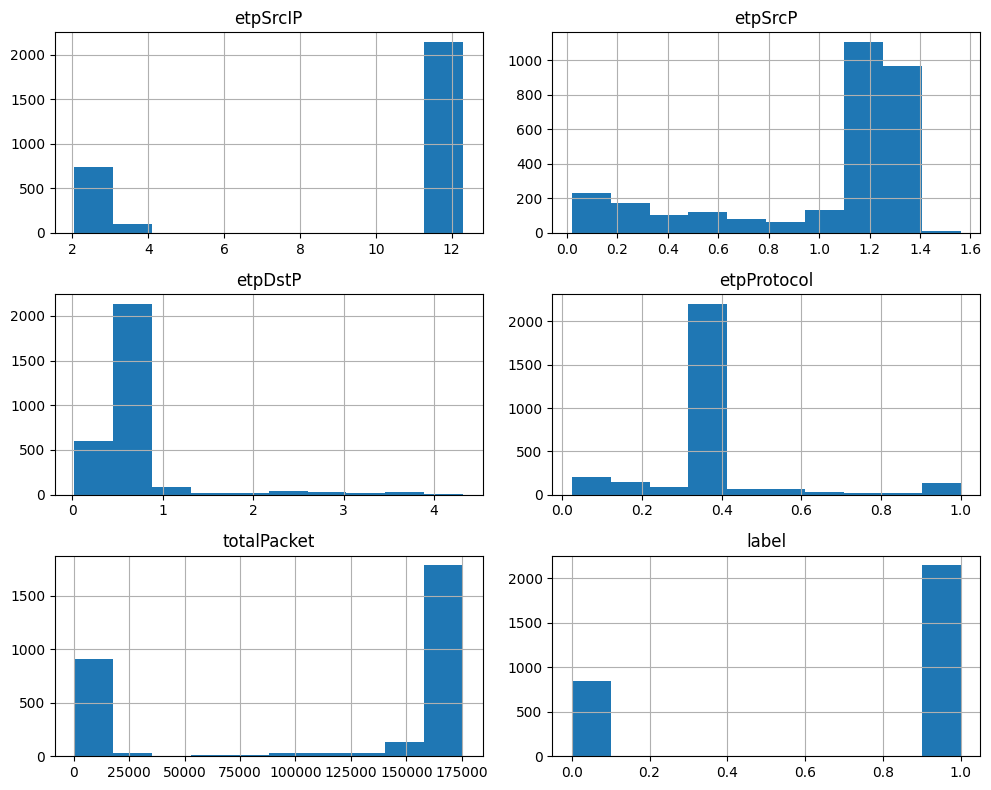

In [9]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



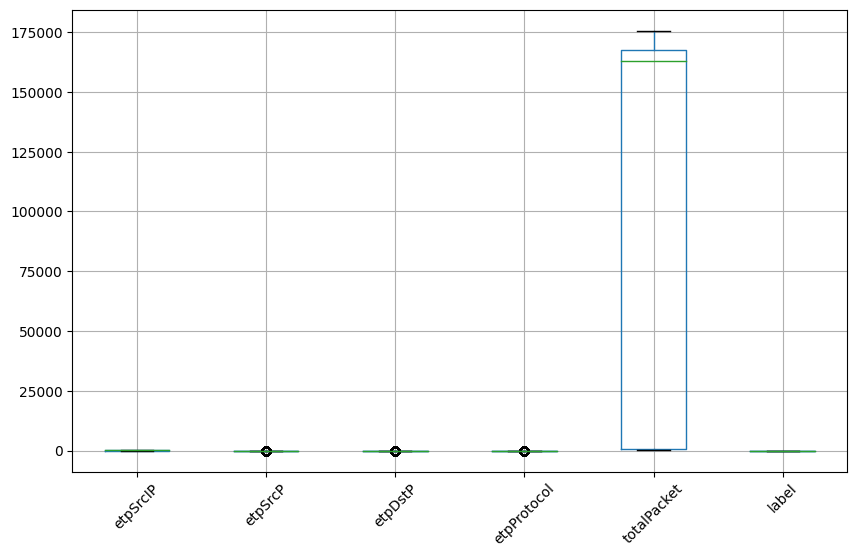

In [10]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# You can also create other types of plots like scatter plots, bar plots, etc. based on your analysis needs

In [11]:
import numpy as np

In [13]:
# df = pd.read_csv(url)

# Define the columns to exclude from normalization
exclude_cols = ['label']  # Add more columns here if needed

# Calculate and store the mean and standard deviation for each dimension, excluding specified columns
mean_std_dict = {}
for col in df.columns:
    if col not in exclude_cols:
        mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method, excluding specified columns
def normalize_with_tanh_estimator(data, mean_std_dict, exclude_cols):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        if col not in exclude_cols:
            mu, sigma = mean_std_dict[col]
            normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
            normalized_data[col] = normalized_col
        else:
            normalized_data[col] = data[col]  # Keep excluded columns as they are
    return normalized_data

# Normalize the dataset using tanh-estimator method, excluding specified columns
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements
print("Mean_std", mean_std_dict ,"\n")


   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
3  0.421834  0.553267  0.690059     0.669480     0.427244      0
4  0.424197  0.437868  0.703396     0.668712     0.427286      0
5  0.424265  0.439113  0.697634     0.669425     0.427300      0
6  0.421573  0.443256  0.670607     0.662346     0.427224      0
7  0.424089  0.443293  0.670921     0.661962     0.427218      0
Mean_std {'etpSrcIP': (9.437737497582425, 4.234022502390504), 'etpSrcP': (1.0014830681710152, 0.4148545486662927), 'etpDstP': (0.783486142367573, 0.5773500479812647), 'etpProtocol': (0.38101732217098544, 0.17530338230820758), 'totalPacket': (111228.13152610442, 75499.55601941863)} 



In [ ]:
mean_std_dict

In [ ]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = normalized_df.iloc[:, :-1].values
y = normalized_df.iloc[:, -1].values


In [ ]:
data = X

In [ ]:
# Plot histograms for each numerical feature
num_features = data.shape[1]  # Get the number of features
fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Create subplots

for i in range(num_features):
    axs[i].hist(data[:, i], bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axs[i].set_title(f'Feature {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [ ]:
X

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler(feature_range=(0, 1))
# X = sc.fit_transform(X)


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df contains only numerical columns that need to be scaled


# # # Normalization
# # scaler = MinMaxScaler()
# # df_normalized = X.copy()
# # df_normalized = scaler.fit_transform(df)

# # Standardization
# scaler = StandardScaler()
# df_standardized = X.copy()
# df_standardized = scaler.fit_transform(X)

# X = df_standardized


# sc = MinMaxScaler(feature_range=(0, 1))
# X = sc.fit_transform(X)
# compute required values
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)

X = scaled_data

In [ ]:
data = X
data

In [ ]:
# Plot histograms for each numerical feature
num_features = data.shape[1]  # Get the number of features
fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Create subplots

for i in range(num_features):
    axs[i].hist(data[:, i], bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axs[i].set_title(f'Feature {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [ ]:

y

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Listing columns and their respective number of missing values
missing_values = df.isnull().sum()

# Displaying the missing values
print("Column Name\t\tMissing Values")
print("----------------------------------")
for column, missing_count in missing_values.items():
    print(f"{column}\t\t\t{missing_count}")

# Creating a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from minisom import MiniSom
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Initialize and train SOM
som_size = 30  # Example size, adjust based on your dataset

In [ ]:
som = MiniSom(som_size, som_size, X_train.shape[1], sigma=15, learning_rate=0.2, random_seed=0 )



In [ ]:
som.random_weights_init(X_train)

In [ ]:
u_matrixfirst = som.distance_map()  # Get the U-matrix

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined markers and colors based on your class labels
markers = ['o', 's']
colors = ['r', 'g']

# Plot the U-Matrix before training
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='bone')

# Add markers based on class labels
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

plt.colorbar()

In [ ]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixfirst, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [ ]:
# # Create plots to visualize the SOM before and after training
# plt.figure(figsize=(12, 6))

# # Plot before training
# plt.subplot(1, 2, 1)
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels before training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# # Train the SOM for 1000 epochs
# som.train_batch(X_train, 1000, verbose = 'true')

# # Plot after training
# plt.subplot(1, 2, 2)
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels after training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# plt.colorbar()
# plt.tight_layout()
# plt.show()

In [ ]:
# # Visualize the SOM before training
# plt.figure(figsize=(6, 6))
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()

In [ ]:
# Train the SOM for 1000 epochs
# som.train_batch(X_train, 10000000, verbose = "true")
som.train_batch(X_train, 100, verbose = "true")

In [ ]:
import pickle

In [ ]:
# with open('som.p', 'rb') as infile:
#     som = pickle.load(infile)

In [ ]:
u_matrixlast = som.distance_map()  # Get the U-matrix

In [ ]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixlast, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [ ]:
# # Visualize the SOM after training
# plt.figure(figsize=(6, 6))
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()


In [ ]:
# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
import pickle

In [ ]:
# # saving the som in the file som.p
# with open('som.p', 'wb') as outfile:
#     pickle.dump(som, outfile)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
def map_to_bmu(som, X):
    winner_coordinates = np.array([som.winner(x) for x in X]).T
    return np.ravel_multi_index(winner_coordinates, (som.get_weights().shape[0], som.get_weights().shape[1]))

# Example usage:
# Assuming 'som' is your trained MiniSom model and 'X' is your input data

# Map input data to BMUs
cluster_index = map_to_bmu(som, X_train)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Example k value, adjust based on your dataset

# Fit k-NN classifier using cluster indices as features
knn.fit(cluster_index.reshape(-1, 1), y_train)  # Assuming 'y' is your target labels

# Example prediction (you can replace X_test with real-time data)
# Assuming 'X_test' is your test set and 'y_test' is your test set labels
test_cluster_index = map_to_bmu(som, X_test)
y_pred = knn.predict(test_cluster_index.reshape(-1, 1))



In [ ]:
y_pred.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
X.shape

In [ ]:
# Evaluate performance
print(classification_report(y_test, y_pred))
# Calculate False Detection Rate (FDR)
precision_recall = classification_report(y_test, y_pred, output_dict=True)
precision_ddos = precision_recall['1']  # Assuming '1' represents DDoS class

FDR = (1 - precision_ddos['precision'])* 100
print(f"False Detection Rate (FDR): {FDR:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [ ]:
roc_auc = auc(fpr, tpr)


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
plt.figure(figsize=(16, 6))


# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='bone')

# Add markers based on class labels
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed


# Step 4: Train the classifier
knn.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
# Option 1: Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Option 2: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Option 3: Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Option 4: Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming y_train contains the labels (0 and 1) for each data point

# # Plot the U-Matrix before training
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("U-Matrix Before Training")
# plt.pcolor(u_matrixfirst, cmap='viridis')
# plt.colorbar()

# # Add labels for the data points
# plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
# plt.ylim(0, 1)  # Adjust y-axis limits for the labels

# # Plot the U-Matrix after training
# plt.subplot(1, 2, 2)
# plt.title("U-Matrix After Training")
# plt.pcolor(u_matrixlast, cmap='viridis')
# plt.colorbar()

# # Add labels for the data points
# plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
# plt.ylim(0, 1)  # Adjust y-axis limits for the labels

# plt.tight_layout()
# plt.show()


In [ ]:
# # making a self organization map
# from pylab import bone, pcolor, colorbar, plot, show
# bone()
# pcolor(som.distance_map().T)
# colorbar()
# markers= ['o', 's']
# colors = ['r', 'g']
# for i, x in enumerate (X):
#   w = som.winner(x)
#   plot(w[0] + 0.5,
#   w[1] + 0.5,
#     markers [y[i]],
#     markeredgecolor =colors [y[i]],
#     markerfacecolor = 'None',
#     markersize = 10,
#     markeredgewidth = 2)
# show()

# # Plot the U-Matrix before training
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("U-Matrix Before Training")
# plt.pcolor(u_matrixfirst, cmap='viridis')
# plt.colorbar()

# # Plot the U-Matrix after training
# plt.subplot(1, 2, 2)
# plt.title("U-Matrix After Training")
# plt.pcolor(u_matrixlast, cmap='viridis')
# plt.colorbar()

# plt.tight_layout()
# plt.show()

In [ ]:
# Get the weights of the neurons
weights = som.get_weights()

# Determine the number of neurons
num_neurons = weights.shape[0] * weights.shape[1]
print("Number of neurons in the SOM:", num_neurons)